In [1]:
import numpy as np
import pandas as pd
import mxnet as mx 
import matplotlib.pyplot as plt
import plotly.plotly as py
import logging

logging.basicConfig(level=logging.DEBUG)

C:\ProgramData\Anaconda3\lib\site-packages\mxnet-1.1.0-py3.6.egg\mxnet\optimizer.py:136: UserWarning: WARNING: New optimizer mxnet.optimizer.NAG is overriding existing optimizer mxnet.optimizer.NAG
  Optimizer.opt_registry[name].__name__))
C:\ProgramData\Anaconda3\lib\site-packages\urllib3\contrib\pyopenssl.py:46: DeprecationWarning: OpenSSL.rand is deprecated - you should use os.urandom instead
  import OpenSSL.SSL


In [2]:
train1=pd.read_csv('C:/Rtemp/DNNtest/train.csv')

In [39]:
cv.shape

(8400, 785)

In [3]:
train=np.asarray(train1.iloc[0:33600,:])

In [4]:
cv=np.asarray(train1.iloc[33600:,:])

In [5]:
trainx=train[:,1:]

In [41]:
trainx.shape

(33600, 784)

In [6]:
cvx=cv[:,1:]

In [43]:
cvx.shape

(8400, 784)

In [7]:
trainx=np.reshape(trainx, (trainx.shape[0],1,28,28))/255

In [8]:
cvx=np.reshape(cvx, (cvx.shape[0],1,28,28))/255

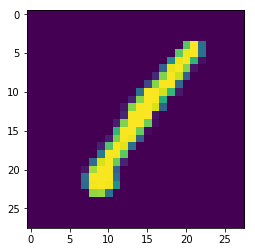

In [9]:
ix=0
img=np.asarray(np.matrix(trainx[ix,0,:,:]))
plt.imshow(img)
#plt.scatter(np.asarray(trainy)[ix,0], np.asarray(trainy)[ix,1], c='r', s=40)
plt.show()

In [10]:
trainy=np.asarray(train[:,0])

In [11]:
cvy=np.asarray(cv[:,0])

In [12]:
#trainy.dtype
trainy.shape

(33600,)

In [ ]:
FULLY CONNECTED NEURAL NETWORK

In [13]:
data = mx.sym.var('data')
Y= mx.symbol.Variable('softmax_label') 

# first fullc layer
flatten = mx.sym.flatten(data=data)
fc1 = mx.symbol.FullyConnected(data=flatten, num_hidden=500)
nlin3 = mx.sym.Activation(data=fc1, act_type="relu") 

# output fullc
fc3 = mx.sym.FullyConnected(data=nlin3, num_hidden=10)
# Softmax output
SNN = mx.symbol.SoftmaxOutput(data=fc3, label=Y, name="SNN") 


In [14]:
SNN_model = mx.mod.Module(symbol=SNN, label_names =['softmax_label'], context=mx.cpu())

In [15]:
batch_size = 100
train_iter = mx.io.NDArrayIter(trainx, trainy, batch_size, shuffle=True)
val_iter = mx.io.NDArrayIter(cvx, cvy, batch_size)

SNN_model.fit(train_iter,  # train data
              eval_data=val_iter,  # validation data
                optimizer='sgd',
                optimizer_params={'learning_rate':0.05, 'momentum': 0.9},
                eval_metric='acc', #'acc' or mx.metric.RMSE()
                batch_end_callback = mx.callback.Speedometer(batch_size=batch_size, frequent=200),
              #batch_end_callback = mx.callback.log_train_metric(2),
                num_epoch=15)


INFO:root:Epoch[0] Batch [200]	Speed: 6307.94 samples/sec	accuracy=0.793980
INFO:root:Epoch[0] Train-accuracy=0.922519
INFO:root:Epoch[0] Time cost=6.003
INFO:root:Epoch[0] Validation-accuracy=0.936310
INFO:root:Epoch[1] Batch [200]	Speed: 7399.99 samples/sec	accuracy=0.946070
INFO:root:Epoch[1] Train-accuracy=0.953481
INFO:root:Epoch[1] Time cost=4.904
INFO:root:Epoch[1] Validation-accuracy=0.956190
INFO:root:Epoch[2] Batch [200]	Speed: 7262.68 samples/sec	accuracy=0.965473
INFO:root:Epoch[2] Train-accuracy=0.967926
INFO:root:Epoch[2] Time cost=4.645
INFO:root:Epoch[2] Validation-accuracy=0.963690
INFO:root:Epoch[3] Batch [200]	Speed: 6816.39 samples/sec	accuracy=0.975920
INFO:root:Epoch[3] Train-accuracy=0.975704
INFO:root:Epoch[3] Time cost=4.779
INFO:root:Epoch[3] Validation-accuracy=0.965833
INFO:root:Epoch[4] Batch [200]	Speed: 7766.07 samples/sec	accuracy=0.982537
INFO:root:Epoch[4] Train-accuracy=0.981481
INFO:root:Epoch[4] Time cost=4.409
INFO:root:Epoch[4] Validation-accuracy

In [ ]:
DEEP FULLY CONNECTED NEURAL NETWORK

In [25]:
data = mx.sym.var('data')
Y= mx.symbol.Variable('softmax_label') 

# first fullc layer
flatten = mx.sym.flatten(data=data)
fc1 = mx.symbol.FullyConnected(data=flatten, num_hidden=500)
nlin1 = mx.sym.Activation(data=fc1, act_type="relu") 

# second fullc layer
fc2 = mx.symbol.FullyConnected(data=nlin1, num_hidden=500)
nlin2 = mx.sym.Activation(data=fc2, act_type="relu") 

# third fullc layer
fc3 = mx.symbol.FullyConnected(data=nlin2, num_hidden=500)
nlin3 = mx.sym.Activation(data=fc3, act_type="relu") 

# output fullc
fc4 = mx.sym.FullyConnected(data=nlin3, num_hidden=10)
# Regress output
DNN = mx.symbol.SoftmaxOutput(data=fc4, label=Y, name="DNN") 

In [26]:
DNN_model = mx.mod.Module(symbol=DNN, label_names =['softmax_label'], context=mx.cpu())

In [27]:
batch_size = 100
train_iter = mx.io.NDArrayIter(trainx, trainy, batch_size, shuffle=True)
val_iter = mx.io.NDArrayIter(cvx, cvy, batch_size)

DNN_model.fit(train_iter,  # train data
              eval_data=val_iter,  # validation data
                optimizer='sgd',
                optimizer_params={'learning_rate':0.05, 'momentum': 0.9},
                eval_metric='acc', #'acc' or mx.metric.RMSE()
                batch_end_callback = mx.callback.Speedometer(batch_size=batch_size, frequent=200),
              #batch_end_callback = mx.callback.log_train_metric(2),
                num_epoch=15)


INFO:root:Epoch[0] Batch [200]	Speed: 2865.04 samples/sec	accuracy=0.105124
INFO:root:Epoch[0] Train-accuracy=0.184296
INFO:root:Epoch[0] Time cost=11.542
INFO:root:Epoch[0] Validation-accuracy=0.253571
INFO:root:Epoch[1] Batch [200]	Speed: 2976.50 samples/sec	accuracy=0.730000
INFO:root:Epoch[1] Train-accuracy=0.913333
INFO:root:Epoch[1] Time cost=11.411
INFO:root:Epoch[1] Validation-accuracy=0.920119
INFO:root:Epoch[2] Batch [200]	Speed: 2969.34 samples/sec	accuracy=0.940995
INFO:root:Epoch[2] Train-accuracy=0.955556
INFO:root:Epoch[2] Time cost=11.425
INFO:root:Epoch[2] Validation-accuracy=0.948571
INFO:root:Epoch[3] Batch [200]	Speed: 2948.02 samples/sec	accuracy=0.963731
INFO:root:Epoch[3] Train-accuracy=0.968519
INFO:root:Epoch[3] Time cost=11.514
INFO:root:Epoch[3] Validation-accuracy=0.960357
INFO:root:Epoch[4] Batch [200]	Speed: 2927.57 samples/sec	accuracy=0.974627
INFO:root:Epoch[4] Train-accuracy=0.976519
INFO:root:Epoch[4] Time cost=11.666
INFO:root:Epoch[4] Validation-acc

In [ ]:
CONVOLUTIONAL NEURAL NETWORK

In [28]:
data = mx.sym.var('data')
Y= mx.symbol.Variable('softmax_label') 

# first conv layer
conv1 = mx.sym.Convolution(data=data, kernel=(5,5), num_filter=20)
nlin1 = mx.sym.Activation(data=conv1, act_type="relu")
pool1 = mx.sym.Pooling(data=nlin1, pool_type="max", kernel=(2,2), stride=(2,2))
drop1 = mx.symbol.Dropout(data=pool1,p=0.5)
# second conv layer
conv2 = mx.sym.Convolution(data=drop1, kernel=(5,5), num_filter=40)
nlin2 = mx.sym.Activation(data=conv2, act_type="relu")
pool2 = mx.sym.Pooling(data=nlin2, pool_type="max", kernel=(2,2), stride=(2,2))
drop2 = mx.symbol.Dropout(data=pool2,p=0.5)
# first fullc layer
flatten = mx.sym.flatten(data=drop2)
fc1 = mx.symbol.FullyConnected(data=flatten, num_hidden=500)
nlin3 = mx.sym.Activation(data=fc1, act_type="relu")

# output fullc
fc2 = mx.sym.FullyConnected(data=nlin3, num_hidden=10)
# Regress output
CNN = mx.symbol.SoftmaxOutput(data=fc2, label=Y,name="CCN")

In [29]:
CNN_model = mx.mod.Module(symbol=CNN, label_names =['softmax_label'], context=mx.cpu())

In [32]:
batch_size = 100
train_iter = mx.io.NDArrayIter(trainx, trainy, batch_size, shuffle=True)
val_iter = mx.io.NDArrayIter(cvx, cvy, batch_size)

CNN_model.fit(train_iter,  # train data
              eval_data=val_iter,  # validation data
                optimizer='sgd',
                optimizer_params={'learning_rate':0.05, 'momentum': 0.9},
                eval_metric='acc', #'acc' or mx.metric.RMSE()
                batch_end_callback = mx.callback.Speedometer(batch_size=batch_size, frequent=200),
              #batch_end_callback = mx.callback.log_train_metric(2),
                num_epoch=15)


INFO:root:Epoch[0] Batch [200]	Speed: 490.66 samples/sec	accuracy=0.108408
INFO:root:Epoch[0] Train-accuracy=0.384593
INFO:root:Epoch[0] Time cost=65.863
INFO:root:Epoch[0] Validation-accuracy=0.895833
INFO:root:Epoch[1] Batch [200]	Speed: 552.99 samples/sec	accuracy=0.907114
INFO:root:Epoch[1] Train-accuracy=0.942444
INFO:root:Epoch[1] Time cost=60.782
INFO:root:Epoch[1] Validation-accuracy=0.973929
INFO:root:Epoch[2] Batch [200]	Speed: 550.81 samples/sec	accuracy=0.954378
INFO:root:Epoch[2] Train-accuracy=0.960370
INFO:root:Epoch[2] Time cost=61.021
INFO:root:Epoch[2] Validation-accuracy=0.981429
INFO:root:Epoch[3] Batch [200]	Speed: 546.97 samples/sec	accuracy=0.964478
INFO:root:Epoch[3] Train-accuracy=0.964593
INFO:root:Epoch[3] Time cost=60.928
INFO:root:Epoch[3] Validation-accuracy=0.986429
INFO:root:Epoch[4] Batch [200]	Speed: 556.53 samples/sec	accuracy=0.967114
INFO:root:Epoch[4] Train-accuracy=0.969852
INFO:root:Epoch[4] Time cost=61.594
INFO:root:Epoch[4] Validation-accuracy